# Sequence Analysis


In [ ]:
%matplotlib inline

from pathlib import Path
#from yupiwrap.tracktable import yupi2tracktable
#from tracktable.core.geomath import length
from typing import List
import numpy as np

import matplotlib.pyplot as plt
from prettytable import PrettyTable
#from tracktable.core.geomath import length, end_to_end_distance

from birdwatchpy.bird_flight_analysis.trajs_plot import plot_2D
from birdwatchpy.bird_flight_analysis.BirdFlightData import BirdFlightData
from birdwatchpy.sequences.sequences_helper import load_sequence_from_pickle


In [ ]:
# parameter (this parameter will be injected by papermill)
sequence_dir_paths: List = []

In [ ]:
for sequence_path in sequence_dir_paths:
    print(sequence_path)

sequences = []
for sequence_dir_path in sequence_dir_paths:
    sequences.append(load_sequence_from_pickle(Path(f"{sequence_dir_path}/{Path(sequence_dir_path).name}.sequence")))

In [20]:
flights: List[BirdFlightData] = []
for sequence in sequences:
    flights.extend(sequence.birds)

/home/kubus/Downloads/tmp_seq/MOT17/test/1631281579072_0008402_0008462/flight_data/dfa4d8ac-3e93-435e-8936-004e2b4a5e67.json
HHHHH
2398.9219763602446
2398.9219763602446
2403.158662591495
2403.158662591495
0.9982370343260307
0.9982370343260307
/home/kubus/Downloads/tmp_seq/MOT17/test/1631281579072_0008402_0008462/flight_data/2a30d732-8d9e-4ab8-82a2-377506f20f59.json
HHHHH
0.17803236131931044
0.17803236131931044
0.17803236131931044
0.17803236131931044
1.0
1.0
/home/kubus/Downloads/tmp_seq/MOT17/test/1631281579072_0008402_0008462/flight_data/08bc5635-81dd-43e8-be15-888159fbc56a.json
HHHHH
2398.9219763602446
2398.9219763602446
2403.158662591495
2403.158662591495
0.9982370343260307
0.9982370343260307
/home/kubus/Downloads/tmp_seq/MOT17/test/1631281579072_0008402_0008462/flight_data/f05b4ee2-cc93-4ae9-8820-8031e05a43e0.json
HHHHH
0.35473269253640816
0.35473269253640816
0.35473269253640816
0.35473269253640816
1.0
1.0
/home/kubus/Downloads/tmp_seq/MOT17/test/1631281579072_0008402_0008462/fligh

## Filter Trajectories
### Filter by length

94
26


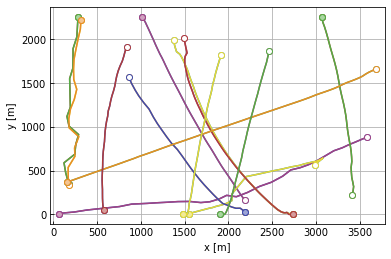

In [15]:
from ipywidgets import Layout, interact, IntSlider


def nb_filter_by_length(x):
    global flights_filtered_by_length
    flights_filtered_by_length = list(filter(lambda flight: flight.length > 400, flights))

    x = PrettyTable()
    x.align = "r"
    x.header = False
    x.add_row(["Flight Count Before", len(flights)])
    x.add_row(["Flight Count After", len(flights_filtered_by_length)])
    print(x)

    plot_2D(list(map(lambda flight: flight.y_traj, flights_filtered_by_length)), legend=False)


#interact(nb_filter_by_length, x=IntSlider(0, 0, 10, 1, layout=Layout(width='500px')));
nb_filter_by_length(1)

### Filter by mean velocity

In [8]:
flights_filtered_by_velocity = list(filter(lambda flight: flight.mean_vel < 1500, flights))

x = PrettyTable()
x.align = "r"
x.header = False
x.add_row(["Flight Count Before", len(flights)])
x.add_row(["Flight Count After", len(flights_filtered_by_velocity)])
print(x)

plot_2D(list(map(lambda flight: flight.y_traj, flights_filtered_by_velocity)), legend=False)

0


## Filter by straightness

In [9]:
print("Straight:")
#straight_flights = list(filter(lambda flight: flight.straightness >= 0.99, flights_filtered_by_length))
#plot_2D(list(map(lambda flight: flight.y_traj, straight_flights)), legend=False)

print("Less Straight:")
#qeer_flights = list(filter(lambda flight: flight.straightness < 0.98, flights_filtered_by_length))
#plot_2D(list(map(lambda flight: flight.y_traj, qeer_flights)), legend=False)

# Bird trajectory analysis

## Multiple Flight analysis

In [10]:
from yupi.stats import speed_ensemble
from yupi.graphics import plot_velocity_hist

if len(flights_filtered_by_length) > 0:
    print(list(map(lambda flight: flight.y_traj, flights_filtered_by_length)))

    v = speed_ensemble(list(map(lambda flight: flight.y_traj, flights_filtered_by_length)), step=1)
    plot_velocity_hist(v, bins=50)

ValueError: need at least one array to concatenate

### Histogram of Turning Angles

In [ ]:
from yupi.graphics import plot_angles_hist
from yupi.stats import turning_angles_ensemble

if len(flights_filtered_by_length) > 0:
    theta = turning_angles_ensemble(list(map(lambda flight: flight.y_traj, flights_filtered_by_length)))
    plot_angles_hist(theta, 10)

### Straightness

In [ ]:
#if len(flights_filtered_by_length) > 0:
#    straighness_data = [flight.straightness for flight in flights_filtered_by_length]
#    plt.hist(straighness_data, density=True, bins=300)
#    plt.xlabel(f'streightness')
#    plt.ylabel('# trajectories')
#    plt.grid()
#    plt.gca().set_axisbelow(True)

#    plt.show()

### Wing Flap Frequency / Bird Size

In [ ]:
from matplotlib.pyplot import figure
data = [[flight.wing_flap_frequency, flight.avg_size] for flight in flights_filtered_by_length]

x,y = zip(*data)
figure(figsize=(10, 10), dpi=100)
plt.scatter(x,y, alpha=0.5)
plt.xlabel('Wing Flap Frequency')
plt.ylabel('Avg Size of Bird')
plt.show()

# Not implemented

# FIDS text generation

## Cluster by Shape

In [ ]:
labels = list(flights_filtered_by_length[0].straightness_dict.keys())
data = list(map(lambda flight: list(flight.straightness_dict.values()), flights_filtered_by_length))

import pandas as pd
import hdbscan
clusterer = hdbscan.HDBSCAN()

clusterer.fit(data)

cluster_names = ["a","b","c","d","e","f","g","h","i","j","k","l"]


plot_2D(list(map(lambda flight: flight.y_traj, flights_filtered_by_length)),
        color=[plt.cm.Pastel1(label) for label in clusterer.labels_],legend=False)



for label in range(max(clusterer.labels_)):
    print(type(clusterer.labels_))
    print(type(np.array(clusterer.labels_)))
    filtered_by_cluster = data[np.array(clusterer.labels_) == label]

    plot_2D(list(map(lambda flight: flight.y_traj, filtered_by_cluster)),
        color=plt.cm.Dark2(label),legend=False)


## Detecting Rendezvous with DBSCAN

Using Tracktable’s box-DBSCAN capabilities, we can detect trajectories that are traveling together for part or all of their journeys.

In [ ]:
#from tracktable.applications.cluster import cluster_trajectories_rendezvous

#clusters = cluster_trajectories_rendezvous(t_trajs)
#lonely_birds = clusters[0]
#print(f"# pack of birds: {len(clusters) - 1}")